Credit Card Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nul

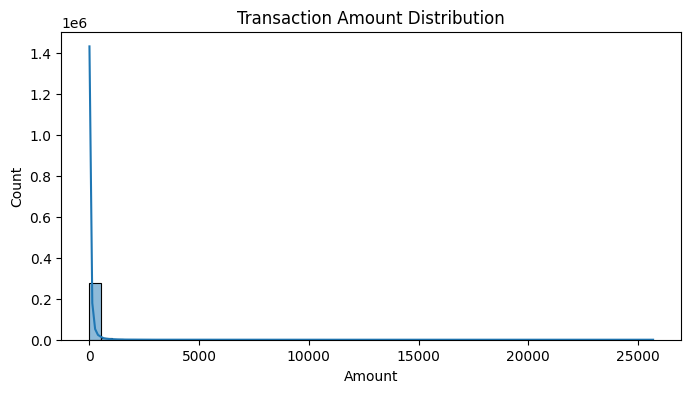

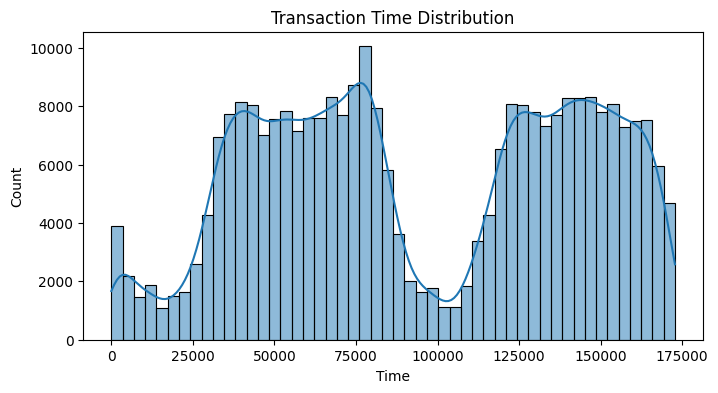

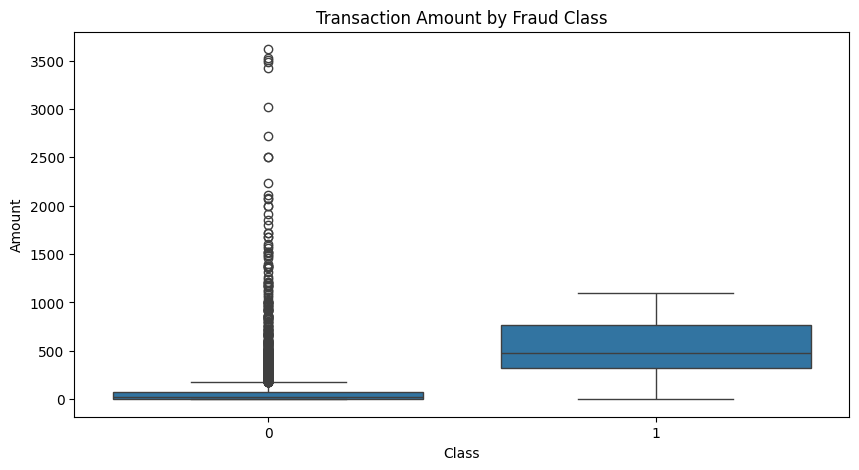

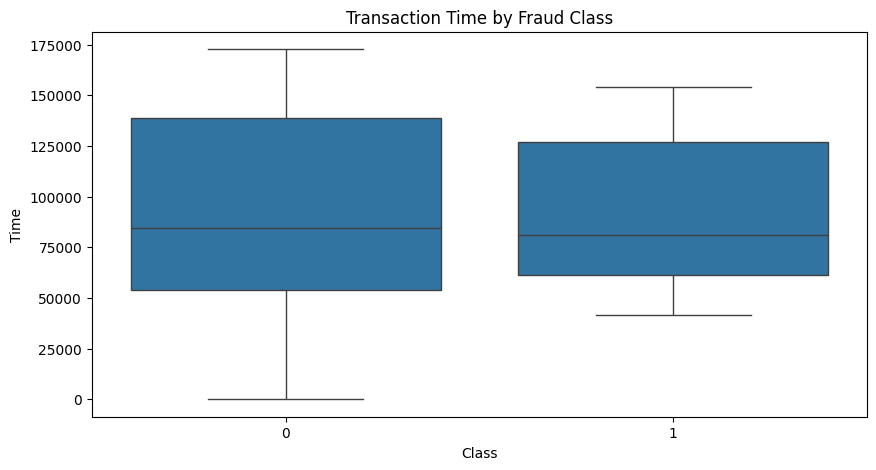

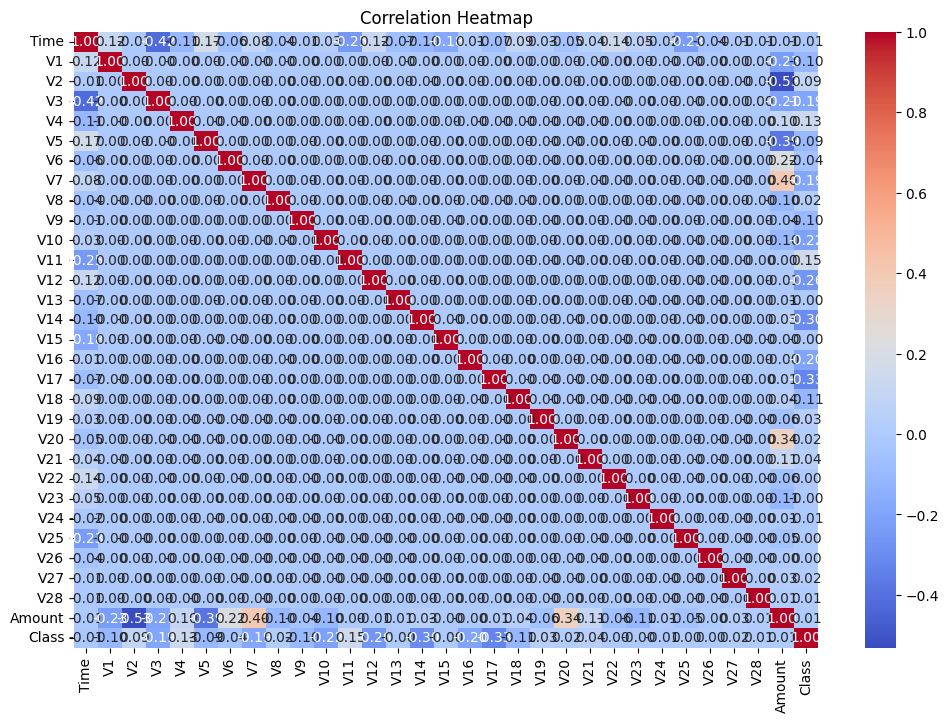

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64

✅ Credit Card data fully processed and ready!


In [5]:
# ---------------------------------------------
# Task 1 & 2: Rich EDA & Preprocessing for Credit Card Fraud
# ---------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# -------------------------------
# Helper Functions
# -------------------------------

def plot_correlation_heatmap(df):
    numeric_df = df.select_dtypes(include='number')
    plt.figure(figsize=(12,8))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

def plot_bivariate_categorical(df, cat_col, target_col='Class'):
    plt.figure(figsize=(8,5))
    cross_tab = pd.crosstab(df[cat_col], df[target_col], normalize='index')
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f"{cat_col} vs {target_col}")
    plt.ylabel("Proportion")
    plt.show()

def preprocess_and_balance_credit(df, target='Class', test_size=0.2, random_state=42):
    X = df.drop(columns=[target])
    y = df[target]

    # Scale 'Amount'
    scaler = StandardScaler()
    X['Amount'] = scaler.fit_transform(X[['Amount']])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    print("Before SMOTE:", y_train.value_counts())
    smote = SMOTE(random_state=random_state)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    print("After SMOTE:", y_train_res.value_counts())

    return X_train_res, X_test, y_train_res, y_test

# -------------------------------
# Load dataset
# -------------------------------
credit = pd.read_csv("../data/raw/creditcard.csv")
print("Credit Card Dataset Info:")
print(credit.info())
print("\nClass distribution:\n", credit['Class'].value_counts())

# -------------------------------
# Univariate EDA
# -------------------------------
plt.figure(figsize=(8,4))
sns.histplot(credit['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(credit['Time'], bins=50, kde=True)
plt.title("Transaction Time Distribution")
plt.show()

# -------------------------------
# Bivariate EDA
# -------------------------------
# Sample subset for faster visualization
sample_credit = credit.sample(n=5000, random_state=42)

plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', data=sample_credit)
plt.title("Transaction Amount by Fraud Class")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Time', data=sample_credit)
plt.title("Transaction Time by Fraud Class")
plt.show()

# Correlation heatmap
plot_correlation_heatmap(credit)

# -------------------------------
# Preprocessing & SMOTE
# -------------------------------
X_train_c, X_test_c, y_train_c, y_test_c = preprocess_and_balance_credit(credit)

# -------------------------------
# Save processed datasets
# -------------------------------
X_train_c.to_csv("../data/processed/X_train_credit.csv", index=False)
X_test_c.to_csv("../data/processed/X_test_credit.csv", index=False)
y_train_c.to_csv("../data/processed/y_train_credit.csv", index=False)
y_test_c.to_csv("../data/processed/y_test_credit.csv", index=False)

print("\n✅ Credit Card data fully processed and ready!")
